In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Удаление лишних данных

In [4]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked'],axis=1)
data_test = data_test.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked'],axis=1)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
#Избавляемся от строчек с Null-значениями
data_train.isnull().sum()
data_train.Age[data_train.Age.isnull()] = data_train.Age.median()
data_train.isnull().sum()
data_test.isnull().sum()
data_test.Age[data_test.Age.isnull()] = data_test.Age.median()
data_test.Fare[data_test.Fare.isnull()] = data_test.Fare.median()
data_test.isnull().sum()

<ipython-input-5-066f046d5ea2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.Age[data_train.Age.isnull()] = data_train.Age.median()
<ipython-input-5-066f046d5ea2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.Age[data_test.Age.isnull()] = data_test.Age.median()
<ipython-input-5-066f046d5ea2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.Fare[data_test.Fare.isnull()] = data_test.Fare.median()


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

# Нормализация данных

In [6]:
def normilize_data(data):
    mx=data.max()
    data = data/mx
    print(data)
    data = data.astype(float)
    return data
data_train['Pclass'] =normilize_data(data_train['Pclass'])
data_train['SibSp'] = normilize_data(data_train['SibSp'])
data_train['Parch'] = normilize_data(data_train['Parch'])
data_train['Fare'] = normilize_data(data_train['Fare'])

data_test['Pclass'] =normilize_data(data_test['Pclass'])
data_test['SibSp'] = normilize_data(data_test['SibSp'])
data_test['Parch'] = normilize_data(data_test['Parch'])
data_test['Fare'] = normilize_data(data_test['Fare'])
data_train.head()

0      1.000000
1      0.333333
2      1.000000
3      0.333333
4      1.000000
         ...   
886    0.666667
887    0.333333
888    1.000000
889    0.333333
890    1.000000
Name: Pclass, Length: 891, dtype: float64
0      0.125
1      0.125
2      0.000
3      0.125
4      0.000
       ...  
886    0.000
887    0.000
888    0.125
889    0.000
890    0.000
Name: SibSp, Length: 891, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
886    0.000000
887    0.000000
888    0.333333
889    0.000000
890    0.000000
Name: Parch, Length: 891, dtype: float64
0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64
0      1.000000
1      1.000000
2      0.666667
3      1.000000
4      1.000000
         ...   
413    1.000000
414    0.333333
415    1.000000
416    1.000000
417  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1.000000,male,22.0,0.125,0.0,0.014151
1,1,0.333333,female,38.0,0.125,0.0,0.139136
2,1,1.000000,female,26.0,0.000,0.0,0.015469
3,1,0.333333,female,35.0,0.125,0.0,0.103644
4,0,1.000000,male,35.0,0.000,0.0,0.015713


In [7]:
from sklearn.preprocessing import MinMaxScaler
def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
data_train = normalize_age(data_train)
data_test = normalize_age(data_test)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1.000000,male,0.271174,0.125,0.0,0.014151
1,1,0.333333,female,0.472229,0.125,0.0,0.139136
2,1,1.000000,female,0.321438,0.000,0.0,0.015469
3,1,0.333333,female,0.434531,0.125,0.0,0.103644
4,0,1.000000,male,0.434531,0.000,0.0,0.015713


In [8]:
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

data_train = sex_to_int(data_train)
data_test = sex_to_int(data_test)
data_test['Sex']=data_test['Sex'].astype(float)
data_train['Sex']=data_train['Sex'].astype(float)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1.000000,1.0,0.271174,0.125,0.0,0.014151
1,1,0.333333,0.0,0.472229,0.125,0.0,0.139136
2,1,1.000000,0.0,0.321438,0.000,0.0,0.015469
3,1,0.333333,0.0,0.434531,0.125,0.0,0.103644
4,0,1.000000,1.0,0.434531,0.000,0.0,0.015713


In [9]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.000000,1.0,0.452723,0.000,0.000000,0.015282
1,1.000000,0.0,0.617566,0.125,0.000000,0.013663
2,0.666667,1.0,0.815377,0.000,0.000000,0.018909
3,1.000000,1.0,0.353818,0.000,0.000000,0.016908
4,1.000000,0.0,0.287881,0.125,0.111111,0.023984
...,...,...,...,...,...,...
413,1.000000,1.0,0.353818,0.000,0.000000,0.015713
414,0.333333,0.0,0.512066,0.000,0.000000,0.212559
415,1.000000,1.0,0.505473,0.000,0.000000,0.014151
416,1.000000,1.0,0.353818,0.000,0.000000,0.015713


In [10]:
X = data_train.drop(['Survived'], axis = 1)
X_test = data_test
print(X.shape)
print(X_test.shape)

(891, 6)
(418, 6)


In [11]:
Y =  np.array(data_train['Survived'])
Y = Y.astype(float)
Y.shape

(891,)

# Обучение модели

Функция активации $sig(x)=\frac{1}{1+exp^{-x}}$:

In [12]:
def sigmoid(x):
     return 1/(1+np.exp(-x))

In [13]:
def deriv(x): # Частная производная
     return x*(1-x)

In [152]:
# Метрики

def MSE(Y_expected, Y_predict):
  return np.mean((Y_expected - Y_predict)**2)

def R2(Y_expected, Y_predict):
    msebas = ((Y_expected - Y_predict.mean()) ** 2).sum() / len(Y)
    msemod = ((Y_predict - Y_expected)**2).sum() / len(Y)
    return 1 - msemod/msebas
    
def Accuracy(Y_expected, Y_predict):
  N=0 #Колличество правильных предсказаний
  Y_predict = Y_predict.T
  for i in range(Y_predict.size): #Проходимся по каждому предсказанию и сравниваем с ожидаемым результатом
    if Y_expected[i]==0 and Y_predict[i]<0.5 or Y_expected[i]==1 and Y_predict[i]>0.5:
      N+=1
  return N/Y_predict.size * 100

def Precision(Y_expected, Y_predict):
  N_True=0 #Колличество правильных предсказаний "Да"
  N=0 #Общее колличество правильных предсказаний
  Y_predict = Y_predict.T
  for i in range(Y_predict.size): #Проходимся по каждому предсказанию и сравниваем с ожидаемым результатом
    if Y_expected[i]==0 and Y_predict[i]<0.5:
      N+=1
    if Y_expected[i]==1 and Y_predict[i]>0.5:
      N+=1
      N_True+=1
  
  try:
    return N_True/N * 100 #Возвращаем ответ по формуле
  except Exception as e:
    pass
  return 0

def Recall(Y_expected, Y_predict):
  N_True=0 #Колличество правильных предсказаний "Да"
  N=0 #Общее колличество "Да"
  Y_predict = Y_predict.T
  for i in range(Y_predict.size): #Проходимся по каждому предсказанию и сравниваем с ожидаемым результатом
    if Y_expected[i]==1 :
      N+=1
      if Y_predict[i]>0.5:
        N_True+=1
  try:
    return N_True/N * 100 #Возвращаем ответ по формуле
  except Exception as e:
    pass
  return 0

def F1(Y_expected, Y_predict):
  prec = Precision(Y_expected, Y_predict)
  rec = Recall(Y_expected, Y_predict)
  try:
    return 2*((prec * rec)/(prec + rec)) #Возвращаем ответ по формуле
  except Exception as e:
    pass
  return 0

In [112]:
#Инициализация весов

weights1 = 2*np.random.random((6,6))-1 #6 нейронов скрытого слоя на 6 входного слоя
print("Случайные веса первого слоя:",weights1)

weights2 = 2*np.random.random((6,6))-1 #6 нейрон выхода на 6 нейронов предыдущего слоя
print("Случайные веса второго слоя:",weights2)

weights3 = 2*np.random.random((6,1)) - 1 #1 нейрон выходного на 6 предыдущего
print("Выход:", weights3)

b1 = 1 #нейроны смещения
b2 = 1
b3 = 1

Случайные веса первого слоя: [[ 0.34889287  0.85731531  0.73796132 -0.41525373 -0.86789847  0.1658881 ]
 [ 0.37033219  0.17682222  0.49361443  0.12203497  0.87068745  0.72062021]
 [ 0.59362756 -0.87423348 -0.45642723  0.32606652  0.40357274 -0.68534113]
 [ 0.62527031 -0.66978626 -0.02737219 -0.40171737 -0.91848547  0.29009057]
 [ 0.59203872  0.67289103  0.40302011  0.90419515  0.10405574  0.40019204]
 [-0.90409315  0.89458743  0.89980449  0.90999583 -0.49353614 -0.87272891]]
Случайные веса второго слоя: [[-0.31779626  0.43870758 -0.20412904 -0.83941925  0.10434368 -0.36519074]
 [ 0.45757101 -0.66412985 -0.11629678  0.82377164 -0.16997098  0.40606168]
 [ 0.14136954  0.20641564 -0.08168748 -0.78377763  0.70848054 -0.44977043]
 [-0.93559255  0.49411715  0.65386467 -0.85306715  0.42516454 -0.36193958]
 [-0.91616289  0.46849427  0.87461897 -0.64111585 -0.68289186 -0.14038299]
 [ 0.38940512 -0.17340914  0.19859981 -0.65759822 -0.05617041  0.39602518]]
Выход: [[ 0.28154642]
 [-0.0618966 ]
 [ 

In [113]:
epochs = 180
J_history = np.zeros(epochs).astype(float)
learning_rate = 0.01

In [114]:
def train(learning_rate,epochs):
    global weights1,weights2,weights3,b1,b2,b3
    epoch = 0
    for epoch in range(epochs):
        outputs1 = sigmoid(np.dot(X,weights1) + b1) #(891,6)
        outputs2 = sigmoid(np.dot(outputs1,weights2) + b2) #(891,6)
        predict = sigmoid(np.dot(outputs2, weights3) + b3) #(891,1)

        mse_array = (predict - Y)**2/len(Y) #(891,891) вектор квадратов ошибки
        mse_array = np.dot(mse_array, np.ones((891,1))) #(891,1)
        mse = mse_array.sum()/ len(mse_array) #средний квадрат ошибки
        J_history[epoch] = mse #сохраняем ошибку последнего слоя
        gradient_layer3 = deriv(mse_array) #(891,1)Градиент выходного слоя
        weights_delta3 = np.dot(mse_array.T, gradient_layer3) #(скаляр) корректировка весов выхода
        weights3 -= weights_delta3 * np.dot(outputs2.T, np.ones((891,1))) * learning_rate #(6,1)Корректируем веса
        
        error2 = weights_delta3 * weights3 #(6,1) вектор квадратов ошибки
        error2 = np.dot(error2, np.ones((1,6))) #(6,6) корректируем размерность
        gradient_layer2 = deriv(outputs2) #(891,6)Градиент выходного слоя
        weights_delta2 = np.dot(gradient_layer2, error2) #(891,6)вектор корректировки весов
        weights2 -= np.dot(weights_delta2.T, outputs1) * learning_rate #(6,6)Корректируем веса
        
        error1 = np.dot(weights_delta2 ,weights2) #(891,6)*(6,6)=(891,6) массив квадратов ошибки
        gradient_layer1 = deriv(outputs1) #(891,6)Градиент выходного слоя
        weights_delta1 = np.dot(error1.T, gradient_layer1) #(6,891)(891,6) = (6,6)Считаем корректировки весов
        weights1 -= weights_delta1 * learning_rate #Корректируем веса
        
        b1 -= (learning_rate*np.dot((error1.T), deriv(outputs1))).sum()/ len(error1)
        b2 -= (learning_rate*np.dot((error2), deriv(outputs2.T))).sum()/ len(error2)
        b3 -= (learning_rate*np.dot((mse_array.T), deriv(predict))).sum()/ len(mse_array)
        
        print(f"{epoch} эпох, ошибка: {mse*100}%")
        
    J = J_history[:epoch]
    print("Обучение закончилось")
    return J, epoch, predict

In [115]:
J, epoch, outputs = train(learning_rate, epochs)

0 эпох, ошибка: 51.69192355173158%
1 эпох, ошибка: 38.38383838383829%
2 эпох, ошибка: 38.38383838383829%
3 эпох, ошибка: 38.38383838383829%
4 эпох, ошибка: 38.38383838383829%
5 эпох, ошибка: 38.38383838383829%
6 эпох, ошибка: 38.38383838383829%
7 эпох, ошибка: 38.38383838383829%
8 эпох, ошибка: 38.38383838383829%
9 эпох, ошибка: 38.38383838383829%
10 эпох, ошибка: 38.38383838383829%
11 эпох, ошибка: 38.38383838383829%
12 эпох, ошибка: 38.38383838383829%
13 эпох, ошибка: 38.38383838383829%
14 эпох, ошибка: 38.38383838383829%
15 эпох, ошибка: 38.38383838383829%
16 эпох, ошибка: 38.38383838383829%
17 эпох, ошибка: 38.38383838383829%
18 эпох, ошибка: 38.38383838383829%
19 эпох, ошибка: 38.38383838383829%
20 эпох, ошибка: 38.38383838383829%

<ipython-input-12-861bca8d4879>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))



21 эпох, ошибка: 38.38383838383829%
22 эпох, ошибка: 38.38383838383829%
23 эпох, ошибка: 38.38383838383829%
24 эпох, ошибка: 38.38383838383829%
25 эпох, ошибка: 38.38383838383829%
26 эпох, ошибка: 38.38383838383829%
27 эпох, ошибка: 38.38383838383829%
28 эпох, ошибка: 38.38383838383829%
29 эпох, ошибка: 38.38383838383829%
30 эпох, ошибка: 38.38383838383829%
31 эпох, ошибка: 38.38383838383829%
32 эпох, ошибка: 38.38383838383829%
33 эпох, ошибка: 38.38383838383829%
34 эпох, ошибка: 38.38383838383829%
35 эпох, ошибка: 38.38383838383829%
36 эпох, ошибка: 38.38383838383829%
37 эпох, ошибка: 38.38383838383829%
38 эпох, ошибка: 38.38383838383829%
39 эпох, ошибка: 38.38383838383829%
40 эпох, ошибка: 38.38383838383829%
41 эпох, ошибка: 38.38383838383829%
42 эпох, ошибка: 38.38383838383829%
43 эпох, ошибка: 38.38383838383829%
44 эпох, ошибка: 38.38383838383829%
45 эпох, ошибка: 38.38383838383829%
46 эпох, ошибка: 38.38383838383829%
47 эпох, ошибка: 38.38383838383829%
48 эпох, ошибка: 38.3838383

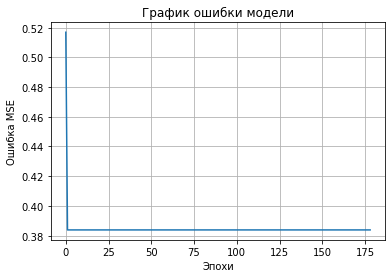

In [134]:
plt.plot( np.arange(epoch),J)
plt.title("График ошибки модели") # заголовок
plt.xlabel("Эпохи") # ось абсцисс
plt.ylabel("Ошибка MSE") # ось ординат
plt.grid()
plt.show()

In [154]:
print("R2:", R2(Y, outputs))
print("MSE:", MSE(Y, outputs))
print("Accuracy:", Accuracy(Y, outputs))
print("Precision:", Precision(Y, outputs))
print("Recall:", Recall(Y, outputs))
print("F1:", F1(Y, outputs))

R2: -890.0000000000001
MSE: 0.3838383838383838


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Теперь произведем ту же операцию с помощью библиотеки Tensorflow

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras import backend as K
from keras.optimizers import RMSprop
import graphviz

In [25]:
# Creating the model
model = Sequential()

# Inputing the first layer with input dimensions
model.add(Dense(6, 
                activation='sigmoid',  
                input_dim=6,
                kernel_initializer='uniform'))
#The argument being passed to each Dense layer (18) is the number of hidden units of the layer. 
# A hidden unit is a dimension in the representation space of the layer.

#Stacks of Dense layers with relu activations can solve a wide range of problems
#(including sentiment classification), and you’ll likely use them frequently.

# Adding an Dropout layer to previne from overfitting
#model.add(Dropout(0.50))

#adding second hidden layer 
model.add(Dense(6,
                kernel_initializer='uniform',
                activation='sigmoid'))

# Adding another Dropout layer
#model.add(Dropout(0.50))

# adding the output layer that is binary [0,1]
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid'))
#With such a scalar sigmoid output on a binary classification problem, the loss
#function you should use is binary_crossentropy

#Visualizing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Creating an Stochastic Gradient Descent
#sgd = SGD(lr = 0.01, momentum = 0.9)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# Compiling our model
model.compile(optimizer = "rmsprop", 
                   loss = root_mean_squared_error, 
                   metrics = ['accuracy'])
#optimizers list
#optimizers['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Fitting the ANN to the Training set
history = model.fit(X, Y, validation_split=0.20, 
                    epochs=180, batch_size=10, verbose=0)

Предсказание

In [27]:
y_preds = model.predict(X_test)
y_preds

array([[0.15006828],
       [0.6886506 ],
       [0.1559073 ],
       [0.14969555],
       [0.607407  ],
       [0.14910209],
       [0.6945283 ],
       [0.15104884],
       [0.66184676],
       [0.14826816],
       [0.1496726 ],
       [0.16119316],
       [0.81705725],
       [0.15481389],
       [0.8237083 ],
       [0.7428719 ],
       [0.15295312],
       [0.14936265],
       [0.63281894],
       [0.7274617 ],
       [0.16357201],
       [0.1485542 ],
       [0.81246066],
       [0.1592542 ],
       [0.85298115],
       [0.15009469],
       [0.8175067 ],
       [0.14943302],
       [0.1606791 ],
       [0.1484212 ],
       [0.1533576 ],
       [0.15015653],
       [0.6421594 ],
       [0.6285502 ],
       [0.1580022 ],
       [0.14924842],
       [0.6876173 ],
       [0.6726655 ],
       [0.14961994],
       [0.15144041],
       [0.15021297],
       [0.15758255],
       [0.15044704],
       [0.7684305 ],
       [0.81974715],
       [0.14957377],
       [0.16146201],
       [0.149

Оценка модели

In [28]:
scores = model.evaluate(X, Y, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

30/30 [==============================] - 0s 499us/step - loss: 0.3886 - accuracy: 0.7980
accuracy: 79.80%


Валидация

In [29]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


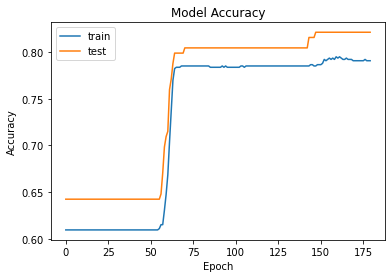

In [30]:
# summarizing historical accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

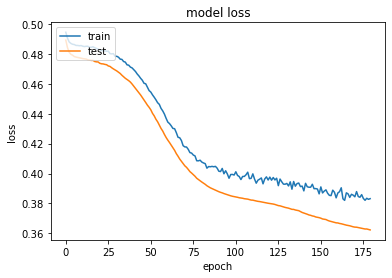

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()